<b>Quantum Fourier Transform (QFT)</b>

In this notebook we will introduce the Quantum Fourier Transform, the analogue of the classical Fourier Transform, that is widely used in physics and maths to transform signals from time or spatial domain to frequency domain. One example of application is, in Computer Vision, to correct images and delete low frequencies, in order to smooth an image that is full of noise.

Here, in the Quantum world, we are going to use the Quantum Fourier Transform in other algorithms, so QFT is an essential part of many algorithms such as Shor's Algorithm, or the Phase Estimation algorithm, that we are going to see in other notebooks. However, Quantum Fourier Transformation has the same core, that is to transform from one domain to frequency domain, and we will reach that by applying some transformations over the amplitudes of the signal.

As a introduction, we are going to see the fundamentals of QFT and the transformations it does.  
  
The discrete Fourier transform acts on a vector (x0,...,xN−1) and maps it to another vector (y0, ... , yN-1) according to this formula:  
$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$  
where $\omega_N^{jk} = e^{2\pi i \frac{jk}{N}}$ , a simple rotation of the state over the z axis.  
  
So, the final mapping that QFT does to our initial qubit, is:  
$\vert j \rangle \mapsto \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}\omega_N^{jk} \vert k \rangle$  
  
To have that, before that map we will have to apply Hadamart gate to all qubits to create a superposition of all states.

Now we will see a visual example to understand better what QFT does to our qubits.  
In the computational basis, we store the qubits in state |0> or |1> (z-axis):  
  
<img src="https://qiskit.org/textbook/ch-algorithms/images/zbasis-counting.gif">  
  
Here, the frequency with which qubit flips its state is different: the leftmost qubit (the least significant, remember 0 is least significant and 3 is most significant) flips with every increment of the number they represent, the next with every 2 increments, and so on. In Fourier basis, we store the numbers doing rotations along z axis:  
  
<img src="https://qiskit.org/textbook/ch-algorithms/images/fourierbasis-counting.gif">  
  
And the number we have to store in the qubits also says the angle at which each qubit is rotated around z-axis. We can also see on the image that all qubits are in |+>, that's why we have to put a Hadamart gate on every qubit. In above example, if we want to encode |5> state, we only have to rotate each qubit, from leftmost to rightmost, by (5/2^n) times. Having 4 qubits as in the example, we will have to do 5/2^4 = 5/16 full turns (5/16 x 2pi radians). The next qubit is rotated double times (10/16 x 2pi radians), and so on... (we only have to double the angle).

Now, to implement the circuit that does the Quantum Fourier Transform, we will use 2 different types of gates. The first one we have introduced it previously, the Hadamart gate, and we will use one new gate: the controlled rotation (CROT) around z-axis, given an angle. We can see a representation of the circuit here:  
  
<img src="https://qiskit.org/textbook/ch-algorithms/images/qft.png">

And now we will build the circuit with Python, and we will make, as a example to easy understand it, a 3-qubit circuit.  
First of all, we will import the packages we need to develop the code:

In [23]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
from math import pi

And then we will place all necessary gates that we can see in above picture. It is important to remember that, in Qiskit least significant bit has index 0, and the most significant bit has index 2 (in our 3-qubit case). Therefore, we will start placing gates on the last qubit, and we will continue in order to finish on the first qubit, with index 0. Finally, to respect the order of the algorithm, we will swap every pair of qubits to reverse the order.

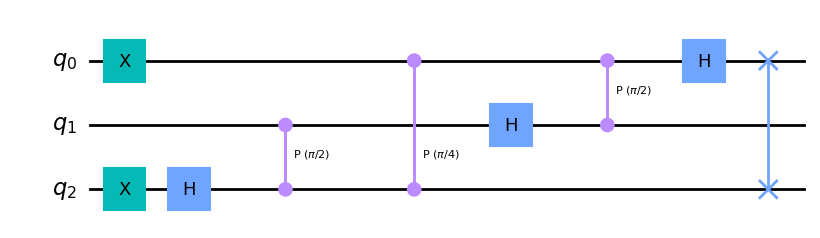

In [24]:
qft = QuantumCircuit(3)

'''We will code the state 5 to do the QFT of the state |101>'''
qft.x(0)
qft.x(2)

qft.h(2)
qft.cp(pi/2, 1, 2)
qft.cp(pi/4, 0, 2)

qft.h(1)
qft.cp(pi/2, 0, 1)

qft.h(0)

qft.swap(0,2)

qft.draw(output='mpl')

And now, we will execute it on a simulator, and we will see the initial state and the final result we obtain from the simulator:

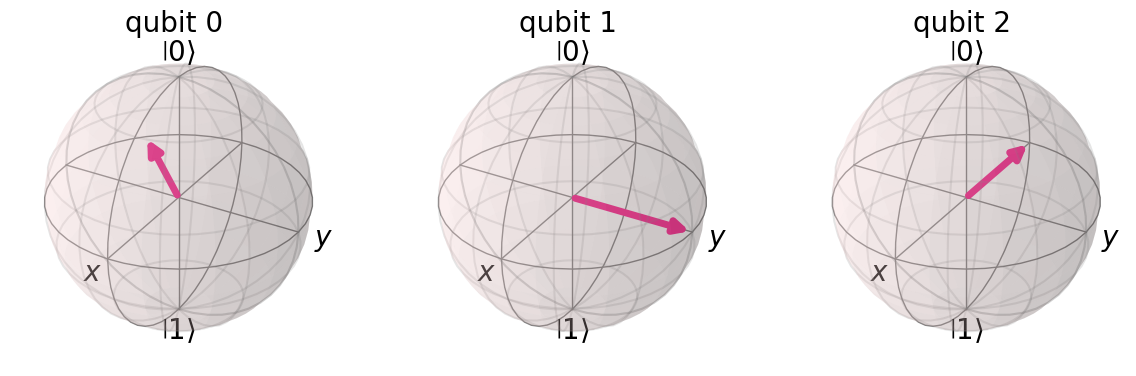

In [25]:
simulator = Aer.get_backend('aer_simulator')
qcopy = qft.copy()
qcopy.save_statevector()
statevector = simulator.run(qcopy).result().get_statevector()
plot_bloch_multivector(statevector)

And here we can see that our circuit works correctly! First qubit has got a rotation of 5/8 full turn, the second qubit by 10/8, and the last qubit by 20/8, equivalent to 1/2 full turn.